# 1.1.6 Regresión lineal simple con la base apartamentos

In [3]:
%load_ext autoreload
%autoreload 2

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

from mypackage import dir
from mypackage.calculates import df_correlations

modality =  modality = 'u'
project = 'regression'
data = dir.make_dir_line(modality, project) 
raw = data('raw')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Use la información de la base de datos para responder las siguientes preguntas.

In [5]:
df = pd.read_csv(raw / 'aptos2015.txt',  sep=' ', skiprows=4)

### crear un id para identificador de muestras
df = df.reset_index()
df.rename(columns={'index':'id_sample'}, inplace=True)
df['id_sample'] = df['id_sample'].astype(str)

df.head()

,id_sample,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
0,1,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
1,2,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
2,3,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
3,4,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
4,5,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si


In [6]:
df.shape

(694, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_sample       694 non-null    object 
 1   precio          694 non-null    float64
 2   mt2             694 non-null    float64
 3   ubicacion       694 non-null    object 
 4   estrato         694 non-null    int64  
 5   alcobas         694 non-null    int64  
 6   banos           694 non-null    int64  
 7   balcon          694 non-null    object 
 8   parqueadero     694 non-null    object 
 9   administracion  694 non-null    float64
 10  avaluo          694 non-null    float64
 11  terminado       694 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 65.2+ KB


In [8]:
df['ubicacion'].value_counts()

ubicacion
poblado           268
aburra sur        169
laureles           73
occidente          69
belen guayabal     67
centro             38
norte              10
Name: count, dtype: int64

In [9]:
df['terminado'].value_counts()

terminado
si    592
no    102
Name: count, dtype: int64

1. ¿Cuántas variables tiene la base de datos? ¿Cuántas observaciones tiene la base de datos? <br>
R./ Cuenta con 6.94 registros u observaciones.
2. ¿Cuáles variables son cualitativas y cuántos niveles tiene cada una? <br>
R./ La primera ubicacion con 7 niveles y la segunda terminado con 2 niveles.
3. Dibujar un diagrama de dispersión del precio del apartamento versus el área del apartamento.

In [10]:
fig = px.scatter(df, x='mt2', y='avaluo')
fig.show()

4. Calcular el coeficiente de correlación de Pearson para las variables del diagrama de dispersión anterior, incluya el valor del coeficiente como un texto en la parte superior izquierda del gráfico anterior.

In [11]:
salida_correlations = df_correlations(df, sort_by_distance=True)
salida_correlations

,Column_1,Column_2,Correlation,type
1,mt2,precio,0.858258,Strong Positive
6,avaluo,precio,0.789532,Strong Positive
12,administracion,mt2,0.774457,Strong Positive
13,avaluo,mt2,0.752844,Strong Positive
5,administracion,precio,0.752635,Strong Positive
41,avaluo,administracion,0.699940,Strong Positive
11,banos,mt2,0.666821,Moderate Positive
19,administracion,estrato,0.636884,Moderate Positive
4,banos,precio,0.626714,Moderate Positive
2,estrato,precio,0.623480,Moderate Positive


5. Nos interesa modelar el precio del apartamento que está en millones de pesos en función de la covariable área del apartamento. El modelo en el cual estamos interesados es el siguiente:

$$ 𝑃𝑟𝑒𝑐𝑖𝑜 \sim 𝑁(\mu_i, \sigma^2) $$
$$ \mu_i = \beta_0 + \beta_1 𝐴𝑟𝑒𝑎_𝑖 $$ 

Ajuste el modelo anterior

In [12]:
df.head()

,id_sample,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
0,1,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
1,2,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
2,3,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
3,4,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
4,5,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si


In [30]:
X = df[['mt2']] 
y = df['precio']   

# Lineal regression
modelo_regresion = LinearRegression().fit(X, y)
y_pred = modelo_regresion.predict(X)

# valores de coeficientes
beta_1 = modelo_regresion.coef_[0]
beta_0 = modelo_regresion.intercept_

# numero de observaciones
n = len(X)

# Calcular el error estándar de la estimación
y_pred = modelo_regresion.predict(X)
error = y - y_pred
error_estandar = np.sqrt(np.sum(error**2) / (n - 2))

# Calcular la desviación estándar de los coeficientes
X_mean = np.mean(X)
desv_est_beta_1 = error_estandar / (np.sqrt(np.sum((X - X_mean)**2)))
desv_est_beta_0 = error_estandar * np.sqrt(np.sum(X**2) / (n * np.sum((X - X_mean)**2)))

# Imprimir error estandar
print("beta_0:", (beta_0))
print("beta_1:", (beta_1))

# Imprimir error estandar
print("Error estandar para beta_0:", (desv_est_beta_0))
print("Error estandar para beta_1:", (desv_est_beta_1))

precision = modelo_regresion.score(X, y)
print("La precición (r2) del modelo es de: {}".format(precision))

beta_0: -26.336863969194212
beta_1: 2.845119391712955
Error estandar para beta_0: mt2    9.191652
dtype: float64
Error estandar para beta_1: mt2    0.064674
dtype: float64
La precición (r2) del modelo es de: 0.7366075927782487


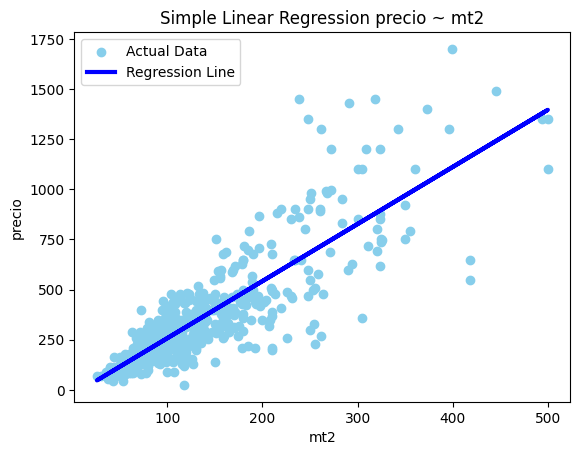

In [31]:
plt.scatter(X, y, color='skyblue', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('mt2')
plt.ylabel('precio')
plt.title('Simple Linear Regression precio ~ mt2')
plt.legend()
plt.show()

6. Escriba el modelo ajustado para la media y para la desviación usando los resultados de la Tabla 1.

In [ ]:
print('ok_')

ok_
